In [99]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot(*args):
    count = len(args)
    fig, ax = plt.subplots(1,count)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    if count==1:
        ax.imshow(args[0], cmap="gray")
    else:
        for i in range(len(ax)):
            ax[i].imshow(args[i], cmap="gray")
    plt.show()

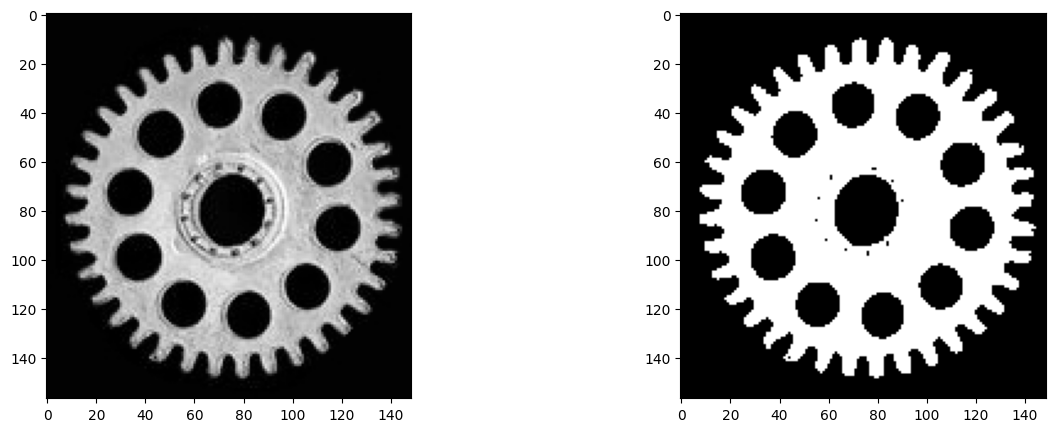

In [100]:
image = cv2.imread("trybik.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.bitwise_not(image)
image_b = image > 60
image_b=image_b.astype("uint8")

contours, hierarchy = cv2.findContours(image_b, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

plot(image, image_b)

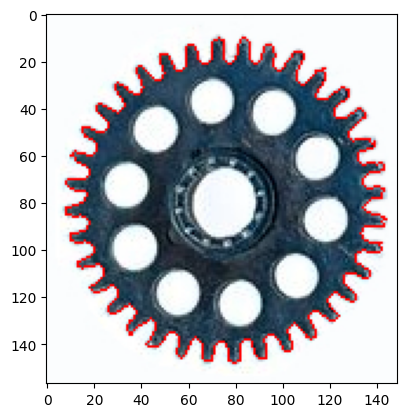

In [101]:
image = cv2.imread("trybik.jpg")
cv2.drawContours(image, contours, 0, (255,0,0))
plt.imshow(image)

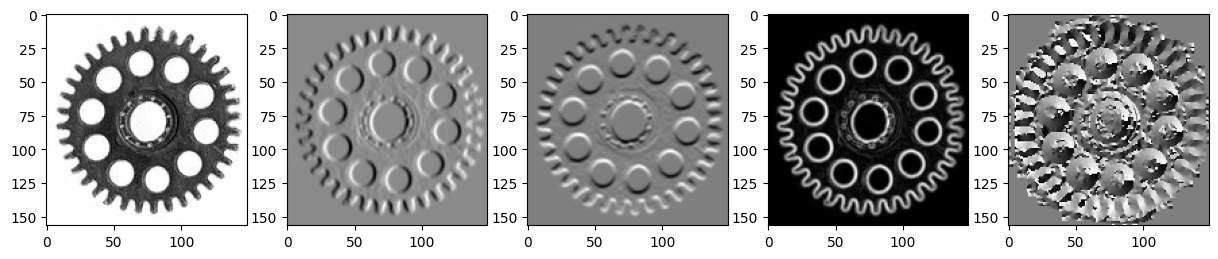

In [102]:
image = cv2.imread("trybik.jpg", cv2.IMREAD_GRAYSCALE)
sobelx = cv2 . Sobel (image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2 . Sobel (image, cv2.CV_64F, 0, 1, ksize=5)
am = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))
am = am/np.max(am)
orien = np.arctan2(sobely, sobelx)
plot(image, sobelx, sobely, am, orien)

In [103]:
ref = cv2.moments(image_b, 1)

In [104]:
center_x, center_y = ref["m01"]/ref["m00"], ref["m10"]/ref["m00"]
print(center_x, center_y)

79.24679160725199 76.5


In [115]:
Rtable = [[] for _ in range (360)]

for point in contours[0]:
    y, x = point[0]
    y_to_center, x_to_center = center_y - y, center_x - x
    aplha = np.arctan2(y_to_center, x_to_center)
    r_angle = np.arctan2(y, x)
    r_angle = int(r_angle*180/np.pi) + 180
    # angle = int(orien[y,x]*180/np.pi)+180
    dist = np.sqrt((center_x-x)**2 + (center_y-y)**2)
    # ang = np.arctan2(x ,y)
    print(r_angle)
    # break
    Rtable[r_angle].append([dist,aplha])

# print(Rtable[0][0])

262
261
261
260
259
258
257
257
256
255
254
253
252
252
252
252
253
254
255
255
256
257
258
257
257
256
255
254
253
253
252
251
250
249
248
247
246
246
246
247
248
249
249
250
251
251
250
250
249
248
247
246
245
244
243
243
242
241
239
239
238
239
239
239
240
240
241
240
238
237
236
236
235
235
234
233
232
231
230
228
228
227
227
226
226
227
226
226
225
225
224
223
222
222
221
221
221
220
220
220
218
217
215
215
214
214
213
212
211
211
210
208
207
207
207
208
208
209
209
208
208
207
205
204
203
202
202
201
200
199
198
197
197
196
197
197
198
198
199
200
200
200
200
199
198
197
196
195
195
194
193
192
191
190
189
190
191
190
191
192
193
194
194
195
195
194
193
192
192
191
190
189
188
188
187
186
186
187
187
188
189
189
190
191
192
192
192
191
191
190
189
189
188
187
186
186
185
185
185
185
186
186
187
187
188
189
189
190
191
191
191
190
190
189
189
188
187
187
186
186
186
186
185
186
187
187
188
188
189
189
190
190
191
191
191
190
189
189
188
188
187
187
186
186
187
187
188
189
189
190


In [98]:
image = cv2.imread("trybiki2.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.bitwise_not(image)
sobelx = cv2 . Sobel (image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2 . Sobel (image, cv2.CV_64F, 0, 1, ksize=5)
am = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))
am = am/np.max(am)

hough = np.zeros(image.shape)

for y in range(len(am)):
    for x in range(len(am[y])):
        if am[y,x]>0.5:
            ang = int(np.arctan2(x, y)*180/np.pi) + 180
            print(ang)
            x1 = -Rtable[ang][0] * np.cos(Rtable[ang][1]) + x
            y1 = -Rtable[ang][0] * np.sin(Rtable[ang][1]) + y
            hough[y1, x1] += 1


plot(image, am)

248


IndexError: list index out of range

In [89]:
Rtable[248]

[]

In [112]:
Rtable[:20]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]